#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [1]:
# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [2]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [3]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [9]:
print(x_train.shape)
print(x_train[0])

(144, 13)
[1.371e+01 1.860e+00 2.360e+00 1.660e+01 1.010e+02 2.610e+00 2.880e+00
 2.700e-01 1.690e+00 3.800e+00 1.110e+00 4.000e+00 1.035e+03]


In [22]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(70, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 70)                980       
                                                                 
 dense_16 (Dense)            (None, 30)                2130      
                                                                 
 activation_5 (Activation)   (None, 30)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                 93        
                                                                 
Total params: 3203 (12.51 KB)
Trainable params: 3203 (12.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=100,
          validation_data=(x_val, y_val),
          verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 11.7308 - accuracy: 0.1042 - val_loss: 3.7537 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.7608 - accuracy: 0.3681 - val_loss: 1.2281 - val_accuracy: 0.1875
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1072 - accuracy: 0.5764 - val_loss: 0.9008 - val_accuracy: 0.5000
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7847 - accuracy: 0.5069 - val_loss: 0.7158 - val_accuracy: 0.5000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5789 - accuracy: 0.5833 - val_loss: 0.6613 - val_accuracy: 0.6250
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.5903 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.6667 - val_loss: 0.5134 - val_accuracy: 0.6250
Epoch 8

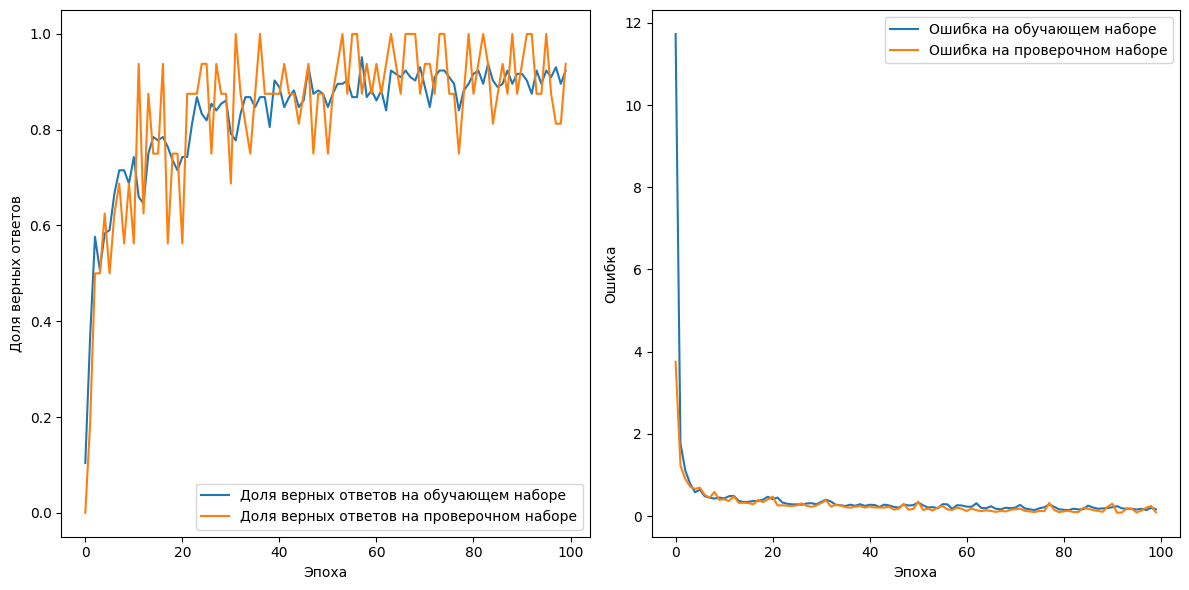

In [24]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

1/1 [==============================] - 0s 116ms/step - loss: 0.1613 - accuracy: 0.9444
Model 1 - Test Accuracy: 0.9444444179534912
